In [75]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('./ebac-sql.csv').dropna()
df.rename(columns={'salario_anual': 'faixa de salário anual','_col2': 'número de pessoas'}, inplace=True)
df

,sexo,faixa de salário anual,número de pessoas
0,M,$60K - $80K,451
1,M,$80K - $120K,488
2,F,menos que $40K,597
3,M,$120K +,222
4,F,$40K - $60K,193
5,M,$40K - $60K,274
6,M,menos que $40K,104


In [84]:
df['maior60k'] = 'Sim'
df.loc[df['faixa de salário anual'].isin(['menos que $40K','$40K - $60K']), 'maior60k'] = 'Não'
df_grouped=df.drop(columns='faixa de salário anual').groupby(by=['sexo','maior60k']).sum().reset_index()
df_grouped = df_grouped.append({'sexo':'F', 'maior60k':'Sim', 'número de pessoas':0}, ignore_index=True)

df_grouped['percentage'] = (df_grouped['número de pessoas'] / df_grouped.groupby('sexo')['número de pessoas'].transform('sum')) * 100
df_grouped

<ipython-input-84-3ce3b5511b03>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_grouped = df_grouped.append({'sexo':'F', 'maior60k':'Sim', 'número de pessoas':0}, ignore_index=True)


,sexo,maior60k,número de pessoas,percentage
0,F,Não,790,100.000000
1,M,Não,378,24.561404
2,M,Sim,1161,75.438596
3,F,Sim,0,0.000000


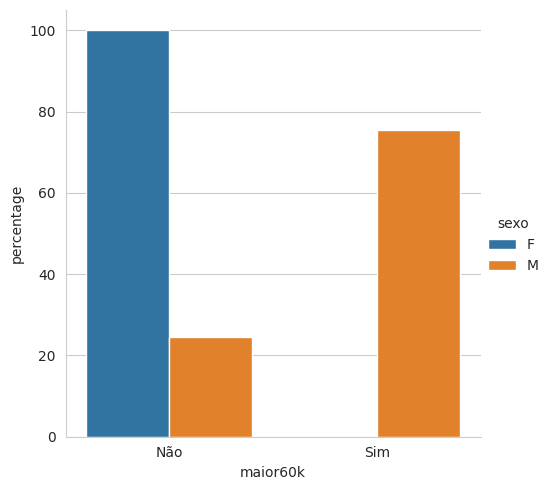

In [83]:
sns.catplot(x='maior60k', y='percentage', hue='sexo', data=df_grouped, kind='bar')